# **NOMS I COGNOMS:**  Manuel Liu Wang, Leying, Wang, Junjie Li

## **GRUP DE LABORATORI:** A

# Optimitzaci√≥ - Descens del gradient

L‚Äôoptimitzaci√≥ matem√†tica o la programaci√≥ matem√†tica √©s la selecci√≥ d‚Äôun millor element a partir d‚Äôun conjunt d‚Äôalternatives disponibles. Problemes d‚Äôoptimitzaci√≥ de tipus sorgeixen en totes les disciplines quantitatives, des de la inform√†tica i l‚Äôenginyeria fins a la investigaci√≥ d‚Äôoperacions i l‚Äôeconomia, i el desenvolupament de m√®todes de soluci√≥ ha estat d‚Äôinter√®s en les matem√†tiques durant segles.

En el cas m√©s senzill, un problema d‚Äôoptimitzaci√≥ consisteix a maximitzar o minimitzar una funci√≥ real mitjan√ßant l‚Äôelecci√≥ sistem√†tica dels valors d‚Äôentrada dins d‚Äôun conjunt perm√®s i el c√†lcul del valor de la funci√≥. 
La generalitzaci√≥ de la teoria i t√®cniques d‚Äôoptimitzaci√≥ a altres formulacions constitueix una √†mplia √†rea de matem√†tiques aplicades. 
M√©s generalment, l‚Äôoptimitzaci√≥ inclou trobar valors "els millors disponibles" d'alguna funci√≥ objectiva donat un domini (o entrada) definits, incloent una varietat de diferents tipus de funcions objectives i diferents tipus de dominis.


Es pot representar un problema d'optimitzaci√≥ de la seg√ºent manera:

- Tenint en compte: una funci√≥ $f : A \to \mathbb{R}$ des d'algun conjunt $A$ als nombres reals.
- Buscat: un element ${x}_0 \in A$ tal que $f({x}_{0}) \leq f({x})$ per a tots els ${x} \in A$ ("minimitzaci√≥") o tal que $f({x}_{0}) \geq f({x})$  per a tots els ${x} \in A$ ("maximitzaci√≥").

La metodologia cr√≠tica per resoldre problemes d'optimitzaci√≥ √©s el **descens del gradient**.

**Prior:**
S'anomena *derivada parcial* d'una funci√≥ de diverses variables a la seva derivada respecte a una d'aquestes variables, deixant les altres constants. Cada derivada indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

El *gradient* de la funci√≥ $f(x_1, \cdots, x_n)$ √©s un vector format per les derivades parcials de la funci√≥. 
Aquest d√≥na la direcci√≥ en la qual la funci√≥ creix m√©s r√†pidament. 

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

## 1. Cas Unidimensionals

Suposem que volem calcular el nimim num√®ric de la seg√ºent funci√≥ unidimensional:

$$ f_1(x) = x^2 $$

La derivada parcial de la funcio $f$ √©s:

$$ \frac{\partial f_1}{\partial x} = 2 x$$

El primer pas que farem √©s visualitzar la funci√≥ i veure el comportament del gradient / derivada sobre un conjunt de punts que pertanyen el domini de la funci√≥.

In [1]:
from plot_utils import *

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def f1(x):
    return x**2

def df1(x):
    return 2*x

(-10.0, 10.0)

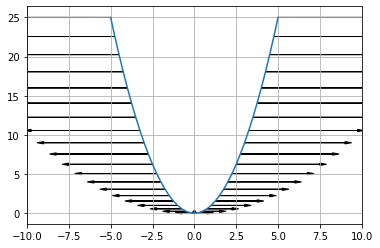

In [3]:
# Function to plot
X = np.arange(-5, 5.01, 0.25)
fig = plt.figure()
plot_1d(X, f1(X), fig)
plot_gradient (X, f1(X), df1(X), fig=fig)
fig.gca().set_xlim(-10, 10)

Per tant, una possible estrat√®gia per maximitzar (*minimitzar*) la funci√≥ √©s reptir la seg√ºent estrat√®gia:

1. Col¬∑locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient.
3. Fer un petit pas en la direcci√≥ (*contraria*) del vector gradient: $x^{k+1} = x^{k}-\alpha^{k} \nabla f(x^{k})$
4. Repetir des de 2

La cerca s'acabaria quan el vector gradient √©s zero, que vol dir que hem trobat un m√†xim (*m√≠nim*). Donat que la presici√≥ flotant potser evita que arribem mai a aquest nombre, afegim dos m√®todes m√©s per acabar la cerca:

1. Si el moviment que realitzem √©s m√©s petit que un epsilon ($|x^{k+1} - x^{k}| < eps$)
2. Si realitzem m√©s de `max_iters` iteracions

Si la funci√≥ √©s **unimodal** (cont√© un √∫nic m√†xim (*m√≠nim*)), hem trobat una la nostra soluci√≥. 
Sin√≥, pot ser que estem en un m√†xim (*m√≠nim*) local i que sigui una soluci√≥ no satisfact√≤ria.

**Implementa la funci√≥ *gradient_descend_1d* seguint el procediment proposat. Durant el proc√©s d'optimitzaci√≥ visualitza els punts de la gr√†fica per on vagis passant.**

 > Recordeu que els ordinadors generen un error num√®ric, per tant no heu d'igualar mai a zero, heu de fer servir una toler√†ncia.
Definiu tamb√© un nombre m√†xim d'iteracions que l'algorisme pot realitzar per arribar al punt desitjat.

In [4]:
def gradient_descend_1d(grad, x, alpha, eps=1e-3, max_iters=1e2):
    """
    Aquesta funci√≥ implementa l'algorisme de descens pel gradient, √©s a dir,
    donat un punt inicial, el gradient i el pas, intenta trobar el m√≠nim
    de la funci√≥ seguint el gradient en direcci√≥ oposada.
    
    :param grad: Gradient de la funci√≥
    :param x: Punt inicial
    :param alpha: Pas de cada iteraci√≥
    :param eps: Moviment m√≠nim realitzat abans de parar
    :param max_epochs: Iteracions m√†ximes a realitzar
    :return: La funci√≥ retornar√† una llista/tupla amb:
        * Una np.array [X] amb el punt inicial m√©s els punts on s'ha mogut a cada iteraci√≥, 
            on X √©s el nombre d'iteracions fetes + 1
        * Una np.array [2] amb els punts del recorregut
    """
    # inicialitzem 
    points = [x]
    minimum = None
    move = abs(x - alpha*grad(x)) # move = abs(x - alpha*grad(x) -x) = abs(alpha*grad(x))
    iterations = 0
    
    while iterations < max_iters and move >= eps:
        # ens movem en la direcci√≥ contr√†ria del vector gradient
        x = x - alpha * grad(x)
        points.append(x)
        # actualitzem el moviment que acabem de realitzar 
        move = abs(alpha*grad(x))
        iterations += 1
    
    # un cop hem arribat aqu√≠, obtenim el m√≠nim, √©s  a dir l'√∫ltim x trobat
    minimum = points[-1]
    
    return (np.array(points),minimum)    

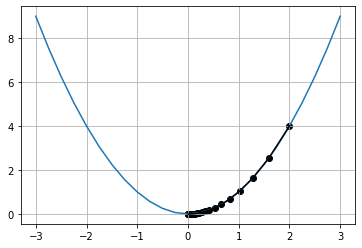

In [5]:
X = np.arange(-3, 3.01, 0.25)
points, minimum = gradient_descend_1d(df1, 2, .1)
fig = plt.figure()
plot_gradient_descend_1d(f1, X, points, minimum, fig)

Per√≤... s√≥n totes els funcions unimodals? Obviament no.

Podem tenir funcions que contenen un m√†xim i un m√≠nim. Per veure com es comporten aquestes funcions **repeteix el procediment anterior amb aquesta nova funci√≥**.

$$f_2(x) = x^3 - 2x + 2$$

$$ \frac{\partial f_2}{\partial x} = 3x^2 -2 x$$

In [6]:
def f2 (x):
    return x**3 - 2*x + 2

def df2(x):
    return 3*x**2 - 2

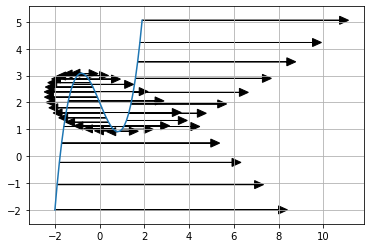

In [7]:
X = np.arange(-2, 2, 0.1)
fig = plt.figure()
plot_1d(X, f2(X), fig)
plot_gradient(X, f2(X), df2(X), fig=fig)

**Comen√ßant en el punt $x=0.75$, √©s possible arribar a valors de $x < -1$ en 10 o menys iteracions? Fer proves demostrant que es pot, o no, arribar-hi.**

**Justifica el comportament del proc√©s d'optimitzaci√≥**

In [8]:
def demonstration(x):
    # prenem diferents valors per alpha
    alphas = [0.1, 0.2, 0.3, 0.5, 0.8, 1, 2, 3]
    
    for alpha in alphas:
        points, minimum = gradient_descend_1d(df2, x, alpha,1e-3,10)
        if minimum < -1:
            print('Amb un valor de ' + str(alpha) + ' d\'alpha hem pogut arribar a valors de x < -1 amb menys de 10 iteracions' )
            return

demonstration(0.75)

Amb un valor de 0.8 d'alpha hem pogut arribar a valors de x < -1 amb menys de 10 iteracions


<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

>> Donat una llista amb diferents valors possibles d'alpha, hem provat d'executar la funci√≥ del gradient implementat anteriorment amb aquests valors d'alpha. Podem veure que hem pogut arribar a valors de x < -1 amb menys de 10 iteracions si alpha = 0.8. Per tant, podem dir que s√≠ que √©s possible trobar l'x desitjat trobant un valor d'alpha adient.

(-2.0, 2.0)

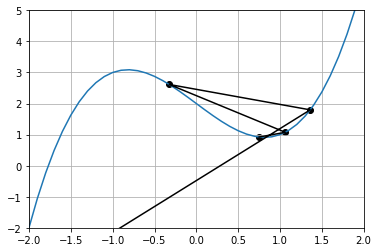

In [9]:
X = np.arange(-20, 20, 0.1)
x0 = 0.75
points, minimum = gradient_descend_1d(df2, x0, 1, max_iters=10)

fig = plt.figure()
plot_gradient_descend_1d(f2, X, points, minimum, fig)
fig.gca().set_ylim([-2, 5])
fig.gca().set_xlim([-2, 2])

#### Podem assegurar que sempre arribem a un minim?

Suposa ara la funci√≥
$$
f_{2.2}(x) = \frac{x}{1+x^2}
$$
amb gradient
$$ \frac{\partial f_{2.2}}{\partial x} = \frac{1-x^2}{(1+x^2)^2}
$$

In [10]:
def f2_2(x):
    return x / (1 + x**2)

def df2_2(x):
    return (1 - x**2) / (1 + x**2)**2

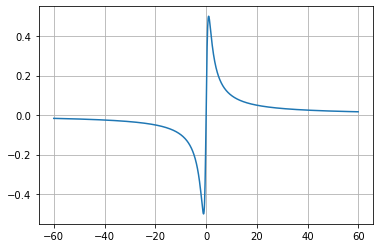

In [11]:
X = np.arange(-60, 60, 0.1)
fig = plt.figure()
plot_1d(X, f2_2(X), fig)

(-10.0, 10.0)

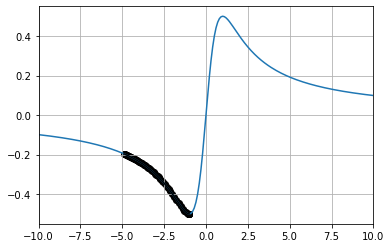

In [12]:
x0 = (np.random.random() - 0.5) * 10
points, minimum = gradient_descend_1d(df2_2, x0, 1)

fig = plt.figure()
plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
fig.gca().set_xlim([-10, 10])

**Justifica el comportament per diferent punts d'inici. Podem arribar sempre al m√≠nim?**

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

>> Els resultats obtinguts es diferencien sobretot pel punt d'inici que li hem assignat. A partir de les execucions podrem veure com no podem arribar sempre al m√≠nim quan el punt d'inici se situa a la dreta del m√†xim de la gr√†fica. Considerant tamb√© que el nombre d'iteracions m√†xims que podem executar, el valor d'alpha tamb√© influeixen a l'hora de convergir a un m√≠nim. 
Que √©s per aquest motiu, ens est√† demostrant, com √©s d'important trobar uns valors adients dels par√†mtres per tal de trobar el valor √≤ptim i pertant, no ens garanteix trobar el m√≠nim.

## Cas N-dimensionals

Podem aplicar el procediment anterior quan tenim funcions dos-dimensionals? La resposta √©s que s√≠. 

L'unic canvi en el procediment √©s que ara caldr√† avan√ßar en dues direccions.

Sigui la funci√≥ 2-dimensional $f_3$:
$$ f_3(x_1, x_2) = x_1^2 + x_2^2$$

i el seu gradient:

$$\nabla {f_3(x_1, x_2)} = 
\left( \frac{\partial f_3}{\partial x_1}, \frac{\partial f_3}{\partial x_2}\right) = 
\left( 2 x_1, 2 x_2 \right)$$

Visualitza la forma de grafica i el comportament del seu gradient.

In [13]:
def f3 ( x, y ):
    return x**2 + y**2

def grad_f3(x, y):
    return np.asarray((2 * x, 2 * y))

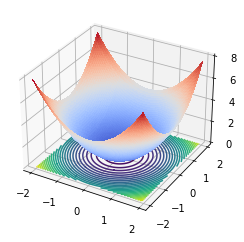

In [14]:
# Surface to plot
fig = plt.figure()
X, Y, Z = generate_grid(f3)
plot_2d(X, Y, Z, fig)

Per veure millor el gradient en aquest cas, podem imprimir el seu comportament en un pla.

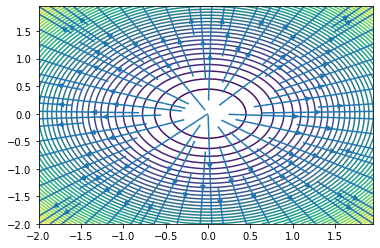

In [15]:
fig = plt.figure()
project_gradient(f3, grad_f3, fig)

Implamenteu l'algorisme anterior amb el cas 2-dimensional.

Recordeu amb amb la llibreria numpy podeu sumar o restar vectors, multiplicar per un escalar, etc.

In [16]:
def gradient_descend_2d(gradient, x, alpha=0.1, eps=1e-6, max_iter=1000, verbose=True):
    """
    Aquesta funci√≥ implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, √©s a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el m√≠nim de la funci√≥ seguint 
    el gradient en direcci√≥ oposada.
    
    :param grad: Gradient de la funci√≥
    :param x: Punt inicial
    :param alpha: Pas de cada iteraci√≥
    :param eps: Moviment m√≠nim realitzat abans de parar
    :param max_iter: Iteracions m√†ximes a realitzar
    :param verbose: En case de ser True, la funci√≥ ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funci√≥ retornar√† una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial m√©s els punts on s'ha mogut a cada iteraci√≥, 
            on X √©s el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    """
    # inicialitzem 
    points = [x]
    minimum = None
    move = abs(x - alpha*gradient(x[0],x[1])) # np array
    iterations = 0
    
    while iterations < max_iter and np.all(move) >= eps:
        # ens movem en la direcci√≥ contr√†ria del vector gradient
        x = x - alpha * gradient(x[0],x[1])
        points.append(x)
        # actualitzem l'array de moviment que acabem de realitzar 
        move = abs(alpha*gradient(x[0],x[1]))
        iterations += 1
    
    # un cop hem arribat aqu√≠, obtenim el m√≠nim, √©s  a dir l'√∫ltim x[0],x[1] trobat
    minimum = points[-1]
    if verbose:
        print('Nombre d\'iteracions: ', iterations)
    return (np.array(points),minimum)
    

In [17]:
# the main difference is that array (by default) will make a copy of the object, while asarray will not unless necessary.
x0 = np.asarray([1, 1])
points, minimum = gradient_descend_2d(grad_f3, x0)

Nombre d'iteracions:  1000


Minimum:  [0. 0.]


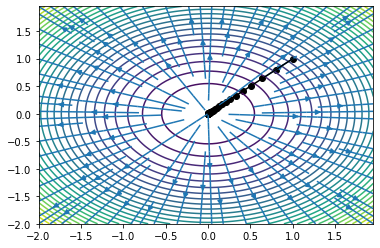

In [18]:
print ("Minimum: ", np.round(minimum,3))

fig = plt.figure()
X, Y, _ = generate_grid(f3)
plot_gradient_descend_2d(f3, grad_f3, X, Y, points, minimum, fig)

Considera ara la funci√≥
$$f_4(x_1, x_2) = 100(x_1^2 + x_2^2)$$

amb gradient

$$\nabla {f_4(x_1, x_2)} = 
\left( \frac{\partial f_4}{\partial x_1}, \frac{\partial f_4}{\partial x_2}\right) = 
\left( 200 x_1, 200 x_2 \right)$$

En aquest cas, igual que en molts altres, √©s m√©s √∫til utilizar el gradient normalizat per aplicar l'algorisme. 

**Fent servir `gradient_descend_2d`, podeu trobar el m√≠nim de les funcions $f_3$ i $f_4$ amb el seg√ºents par√†metres:**

* $\alpha$ igual en les dues crides, es pot modificar
* $x=(1, 1)$ en les dues crides
* `max_iter=100` en les dues crides
* `eps=1e-6` en les dues crides

**Justifica perque s√≥n capa√ßos, o no, de trobar el m√≠nim amb aquest par√†metres. Quines dificultats presenta?**

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

>> Provem amb diferents valors d'alpha, podem veure que f4 convergeix m√©s al m√≠nim amb valors d'alpha petits, en canvi, f3 necessita valors d'alpha m√©s grans. El fet de normalitzar ens permet convergir al m√≠nim de forma m√©s directa, perqu√® si no el normalitzem i hi ha gran difer√®ncia entre les magnituds de les variables, llavors, ens presentar√† grans oscil.lacions a l'hora de convergir, de forma que el step que necessitem ser√† m√©s gran. En canvi si fem servir valors d'alpha grans podem perdre o allunyar-nos del m√≠nim que intentem convergir com per exemple, amb un valor de 0.01 per f4 no convergim, i fins i tot podem arribar a divergir si aquest √©s massa gran (alpha = 0.0100000009)

In [19]:
def f4(x, y):
    return 100 * (x**2 + y**2)

def grad_f4(x, y):
    return np.asarray((200 * x, 200 * y))

In [20]:
x0 = np.asarray((1, 1))
alpha = 0.0100000009
points_f3, minimum_f3 = gradient_descend_2d(grad_f3, x0, alpha=alpha, max_iter=100, eps=1e-6)
points_f4, minimum_f4 = gradient_descend_2d(grad_f4, x0, alpha=alpha, max_iter=100, eps=1e-6)

Nombre d'iteracions:  100
Nombre d'iteracions:  100


[0.13261953 0.13261953]


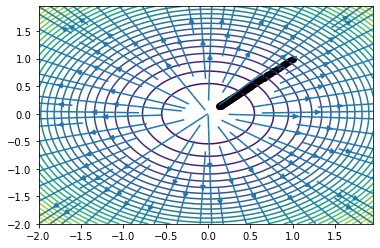

In [21]:
fig = plt.figure()
X, Y, _ = generate_grid(f3)
plot_gradient_descend_2d(f3, grad_f3, X, Y, points_f3, minimum_f3, fig)
print(minimum_f3)

[1.000018 1.000018]


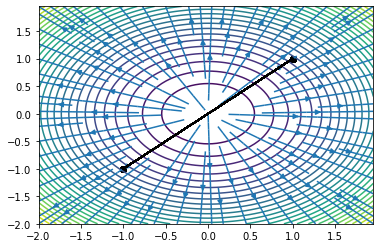

In [22]:
fig = plt.figure()
X, Y, _ = generate_grid(f4)
plot_gradient_descend_2d(f4, grad_f4, X, Y, points_f4, minimum_f4, fig)
print(minimum_f4)

## Temps de converg√®ncia

Observa ara la seg√ºent funci√≥, anomenada funci√≥ de **Rosenbrock**.

$$ f(x_1, x_2) = (a - x_1)^2 + b (x_2 - x_1^2)^2$$

**El m√≠nim d'aquesta funci√≥ es troba al punt: $(x_1, x_2) = (a, a^{2})$.**

In [23]:
A_ROS = 1

def f_ros(x, y, a=A_ROS, b=10):
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y, a=A_ROS, b=10):
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

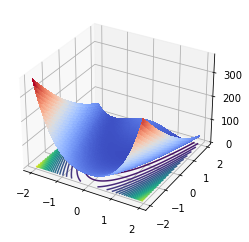

In [24]:
# Surface to plot
fig = plt.figure()
X, Y, Z = generate_grid(f_ros)
plot_2d(X, Y, Z, fig)

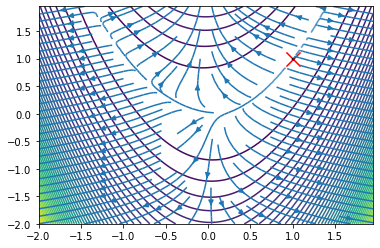

In [25]:
fig = plt.figure()
project_gradient(f_ros, grad_f_ros, fig)
plt.scatter(A_ROS, A_ROS**2, marker='x', color='r', s=200)

Aquesta funci√≥ t√© un m√≠nim molt pla, la pendent √©s pr√†cticament nula al sel voltat, pel que els m√®todes iteratius tarden molt a trobar el m√≠nim

Nombre d'iteracions:  7883
[1. 1.]


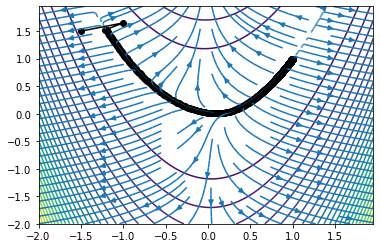

In [26]:
fig = plt.figure()
x0 = np.asarray((-1.5, 1.5))
points, minimum = gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

### Trobant el pas √≤ptim

Una possibilitat per fer menys iteracions i accelerar la converg√®ncia √©s trobant el valor de $\alpha$ autom√†ticament a cada pas, √©s a dir aquella $\alpha$ que fa m√≠nim el valor de $f$.

L'algorisme √©s tal que:

1. Col¬∑locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient
3. $\alpha = 10$
4. Calcular $x^{k+1} = x^{k}-\alpha \nabla f(x^{k})$
5. Si $f(x^{k+1}) > f(x^{k})$, $\alpha = \alpha / 2$, descartar $x^{k+1}$ i tornar al pas 4
6. En cas contrari, moure's a $x^{k+1}$ i repetir des de 2

In [27]:
def gradient_descend_2d_auto(f, gradient, x, eps=1e-6, max_iter=1000, initial_alpha=10, verbose=True):
    """
    Aquesta funci√≥ implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, √©s a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el m√≠nim de la funci√≥ seguint 
    el gradient en direcci√≥ oposada.
    
    :param f: Funci√≥ a minimitzar
    :param grad: Gradient de la funci√≥
    :param x: Punt inicial
    :param eps: Moviment m√≠nim realitzat abans de parar
    :param max_iter: Iteracions m√†ximes a realitzar
    :param initial_alpha: Pas inicial a cada iteraci√≥, corresponent al punt 3 anterior
    :param verbose: En case de ser True, la funci√≥ ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funci√≥ retornar√† una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial m√©s els punts on s'ha mogut a cada iteraci√≥, 
            on X √©s el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    # inicialitzem 
    points = [x]
    minimum = None
    alpha = initial_alpha
    move = abs(x - alpha*gradient(x[0],x[1])) # np array
    iterations = 0
    
    while iterations < max_iter and np.all(move) >= eps:
        # Calcular  ùë•ùëò+1=ùë•ùëò‚àíùõº‚àáùëì(ùë•ùëò)
        xk = x - alpha * gradient(x[0],x[1])
        # f(xk) major
        if (f(xk[0],xk[1]) > f(x[0],x[1])):
            alpha /= 2
            # descartem xk
            points.append(x)
        else:
            points.append(xk)
            #actualitzem x
            x = xk
        
        # actualitzem l'array de moviment que acabem de realitzar 
        move = abs(alpha*gradient(x[0],x[1]))
        iterations += 1
    
    # un cop hem arribat aqu√≠, obtenim el m√≠nim, √©s  a dir l'√∫ltim x[0],x[1] trobat
    minimum = points[-1]
    if verbose:
        print('Nombre d\'iteracions: ', iterations)
    return (np.array(points),minimum)    
    """
    i = 0
    l = list()
    l.append((x))
    alpha = initial_alpha
    while i < max_iter:
        
        if np.all(abs(alpha * gradient(x[0], x[1])) > eps):
            x_orig = x
            x = x - alpha * gradient(x[0],x[1])
            if(f(x[0],x[1])>f(x_orig[0],x_orig[1])):
                alpha = alpha/2
                x = x_orig
            else:
                alpha = initial_alpha
                l.append((x))
                i += 1
        else:
            break
    if verbose:
        print(len(l))
        print(i)
        return np.array(l), np.array(l[-1])
    else: 
        return np.array(l), np.array(l[-1])

412
411
[0.99635827 0.9927313 ]


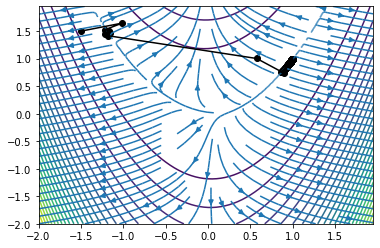

In [28]:
fig = plt.figure()
x0 = np.asarray((-1.5, 1.5))
points, minimum = gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

In [29]:
%timeit gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000, verbose=False)

227 ms ¬± 23.2 ms per loop (mean ¬± std. dev. of 7 runs, 10 loops each)


In [30]:
%timeit gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000, verbose=False)

173 ms ¬± 24.6 ms per loop (mean ¬± std. dev. of 7 runs, 10 loops each)
